In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

os.chdir("/mnt/d/Manal/phd_ppr_manal/number_of_case_per_model/")

In [4]:
#importing data

df_bin = pd.read_csv("cases_per_experiment_binomial.csv")

df_logit = pd.read_csv("cases_per_experiment_logit.csv")

df_seg = pd.read_csv("cases_per_experiment_segmented_2m.csv")

df_env = pd.read_csv("cases_per_experiment_enveloppe_2m.csv")

df_ML = pd.read_csv("cases_per_experiment_logistic_ML.csv")

df_bern = pd.read_csv("baseline_bernoulli_pred.csv")

df_model1 = pd.read_csv("model1_pred.csv")
df_model2 = pd.read_csv("model2_pred.csv")
df_model3 = pd.read_csv("model3_pred.csv")
df_model4 = pd.read_csv("model4_pred.csv")
df_model5 = pd.read_csv("model5_pred.csv")

In [5]:
def combine_columns(df, col1, col2, new_col):
    combined_column = df[col1].astype(str) + "_" + df[col2].astype(str)
    df.insert(0, new_col, combined_column)
    df.drop([col1, col2], axis=1, inplace=True)
    return df

def calculate_sd(df, col1, col2, new_col):
    df.loc[:, new_col] = np.sqrt(df[col1] * (df[col2] - df[col1]))
    return df

def calculate_mean(df, col_pattern, new_col):
    col_list = [col for col in df.columns if col_pattern in col]
    df[new_col] = df[col_list].mean(axis=1)
    return df, col_list

def calculate_quantiles(df, data, quantiles, labels):
    quantile_values = np.quantile(data, q=quantiles, axis=1).astype(float)
    for i, label in enumerate(labels):
        df[label] = quantile_values[i]
    return df

In [6]:
# Use the functions to process your data

#baseline models
df_bern = combine_columns(df_bern, 'experiment', 'duration', 'Exp')
df_bin = combine_columns(df_bin, 'experiment', 'duration', 'Exp')

#segmented model

df_seg = combine_columns(df_seg, 'experiment', 'duration', 'Exp')


# enveloppe model
df_env = combine_columns(df_env, 'experiment', 'duration', 'Exp')


df_logit = combine_columns(df_logit, 'experiment', 'duration', 'Exp')

# ML model
df_ML = combine_columns(df_ML, 'experiment', 'duration', 'Exp')


# stratified models

df_model1 = combine_columns(df_model1, 'experiment', 'duration', 'Exp')
df_model2 = combine_columns(df_model2, 'experiment', 'duration', 'Exp')
df_model3 = combine_columns(df_model3, 'experiment', 'duration', 'Exp')
df_model4 = combine_columns(df_model4, 'experiment', 'duration', 'Exp')
df_model5 = combine_columns(df_model5, 'experiment', 'duration', 'Exp')


datacal = df_env[["Exp", "N", "positives"]]  
datacal.columns = ["Exp", "N", "obs"]
datacal = calculate_sd(datacal, 'obs', 'N', 'sd')

df_env, y_pred_columns_env = calculate_mean(df_env, 'prob', 'Mean')
y_pred_data_env = df_env[y_pred_columns_env].values


df_seg, y_pred_columns_seg = calculate_mean(df_seg, 'prob', 'Mean')
y_pred_data_seg = df_seg[y_pred_columns_seg].values


df_logit, y_pred_columns_logit = calculate_mean(df_logit, 'prob', 'Mean')
y_pred_data_logit = df_logit[y_pred_columns_logit].values

df_ML, y_pred_columns_ML = calculate_mean(df_ML, 'prob', 'Mean')
y_pred_data_ML = df_ML[y_pred_columns_ML].values


df_bern, y_pred_columns_bern = calculate_mean(df_bern, 'pred', 'Mean')
y_pred_data_bern = df_bern[y_pred_columns_bern].values

df_model1, y_pred_columns_model1 = calculate_mean(df_model1, 'pred', 'Mean')
y_pred_data_model1 = df_model1[y_pred_columns_model1].values

df_model2, y_pred_columns_model2 = calculate_mean(df_model2, 'pred', 'Mean')
y_pred_data_model2 = df_model2[y_pred_columns_model2].values

df_model3, y_pred_columns_model3 = calculate_mean(df_model3, 'pred', 'Mean')
y_pred_data_model3 = df_model3[y_pred_columns_model3].values

df_model4, y_pred_columns_model4 = calculate_mean(df_model4, 'pred', 'Mean')
y_pred_data_model4 = df_model4[y_pred_columns_model4].values

df_model5, y_pred_columns_model5 = calculate_mean(df_model5, 'pred', 'Mean')
y_pred_data_model5 = df_model5[y_pred_columns_model5].values

quantiles = [0.025, 0.25, 0.5, 0.75, 0.975]
quantile_labels = ['CI_2.5', 'CI_25', 'Median', 'CI_75', 'CI_97.5']
df_env = calculate_quantiles(df_env, y_pred_data_env, quantiles, quantile_labels)
df_seg = calculate_quantiles(df_seg, y_pred_data_seg, quantiles, quantile_labels)
df_logit = calculate_quantiles(df_logit, y_pred_data_logit, quantiles, quantile_labels)
df_ML = calculate_quantiles(df_ML, y_pred_data_ML, quantiles, quantile_labels)
df_bern = calculate_quantiles(df_bern, y_pred_data_bern, quantiles, quantile_labels)
df_model1 = calculate_quantiles(df_model1, y_pred_data_model1, quantiles, quantile_labels)
df_model2 = calculate_quantiles(df_model2, y_pred_data_model2, quantiles, quantile_labels)
df_model3 = calculate_quantiles(df_model3, y_pred_data_model3, quantiles, quantile_labels)
df_model4 = calculate_quantiles(df_model4, y_pred_data_model4, quantiles, quantile_labels)
df_model5 = calculate_quantiles(df_model5, y_pred_data_model5, quantiles, quantile_labels)


df_env.drop(y_pred_columns_env, axis=1, inplace=True)
df_seg.drop(y_pred_columns_seg, axis=1, inplace=True)
df_logit.drop(y_pred_columns_logit, axis=1, inplace=True)
df_ML.drop(y_pred_columns_ML, axis=1, inplace=True)
df_bern.drop(y_pred_columns_bern, axis=1, inplace=True)
df_model1.drop(y_pred_columns_model1, axis=1, inplace=True)
df_model2.drop(y_pred_columns_model2, axis=1, inplace=True)
df_model3.drop(y_pred_columns_model3, axis=1, inplace=True)
df_model4.drop(y_pred_columns_model4, axis=1, inplace=True)
df_model5.drop(y_pred_columns_model5, axis=1, inplace=True)

/tmp/ipykernel_78947/2545930726.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_col] = np.sqrt(df[col1] * (df[col2] - df[col1]))


In [34]:
df_model5

,Exp,N,obs,Mean,CI_2.5,CI_25,Median,CI_75,CI_97.5
0,1_1,6,0,0.37115,0.0,0.0,0.0,1.0,2.0
1,1_6,6,0,0.99804,0.0,0.0,1.0,2.0,3.0
2,1_24,6,0,2.11669,0.0,1.0,2.0,3.0,4.0
3,2_24,6,1,0.63071,0.0,0.0,0.0,1.0,2.0
4,2_44,6,4,2.70468,0.0,2.0,3.0,4.0,5.0
5,3_24,5,3,0.97719,0.0,0.0,1.0,2.0,3.0
6,4_24,6,0,0.48172,0.0,0.0,0.0,1.0,2.0
7,4_48,5,4,1.81821,0.0,1.0,2.0,2.0,4.0
8,5_24,6,1,2.26547,0.0,1.0,2.0,3.0,5.0
9,5_48,6,3,2.09072,0.0,1.0,2.0,3.0,4.0


### Binomial VS ML logistic regression

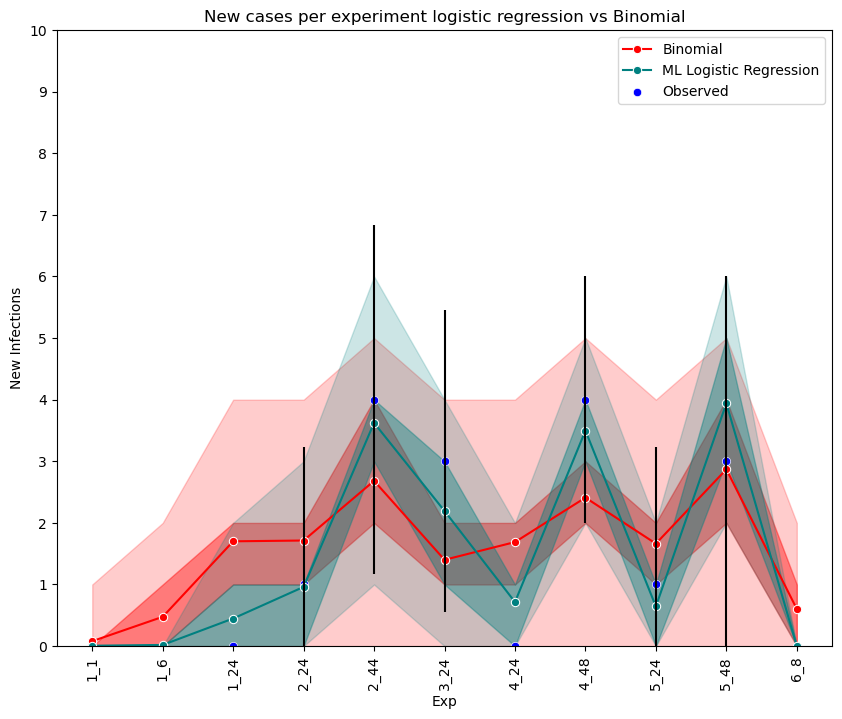

In [7]:
# Plotting the main line and points
plt.figure(figsize=(10, 8))


# plotting results of binomial model in green
sns.lineplot(data=df_bin, x='Exp', y='Mean', color='r', marker= 'o', label='Binomial')
plt.fill_between(df_bin['Exp'], df_bin['CI_2.5'], df_bin['CI_97.5'], color='r', alpha=0.2)
plt.fill_between(df_bin['Exp'], df_bin['CI_25'], df_bin['CI_75'], color='r', alpha=0.4)

# plotting results of envelope model in red
sns.lineplot(data=df_ML, x='Exp', y='Mean', color='teal', marker= 'o', label='ML Logistic Regression')
plt.fill_between(df_ML['Exp'], df_ML['CI_2.5'], df_ML['CI_97.5'], color='teal', alpha=0.2)
plt.fill_between(df_ML['Exp'], df_ML['CI_25'], df_ML['CI_75'], color='teal', alpha=0.4)


# Adding points and error bars from real observations
sns.scatterplot(data=datacal, x='Exp', y='obs', color='blue', label='Observed')
plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')


# Setting labels and title
plt.title("New cases per experiment logistic regression vs Binomial")
plt.xlabel("Exp")
plt.ylabel("New Infections")

# Setting y-limits and y-ticks
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

# Rotating x-axis labels
plt.xticks(rotation=90)

# Hiding the legend
plt.legend()

plt.show()

### Binomial VS Logistic

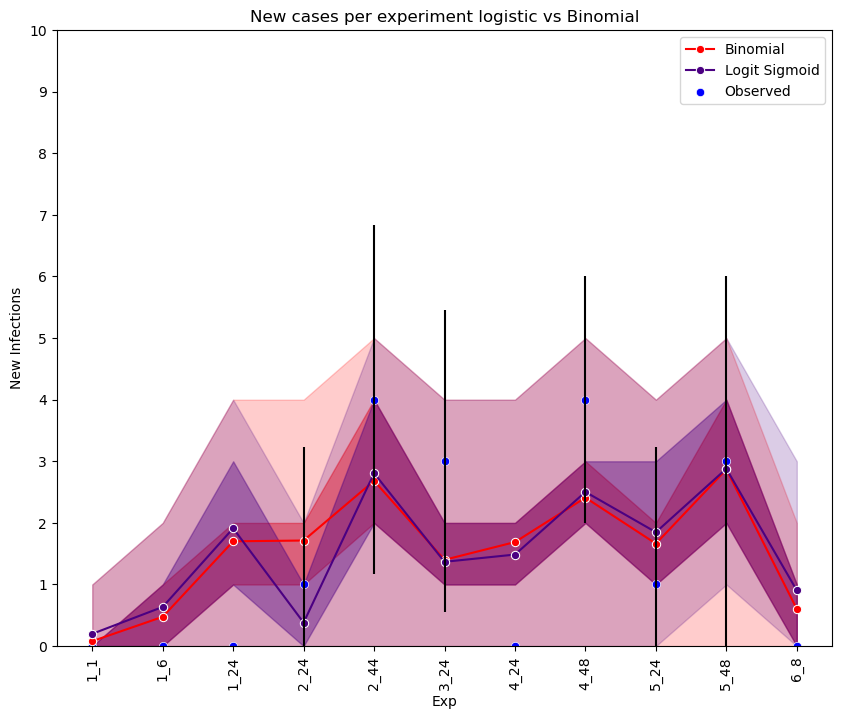

In [8]:
# Plotting the main line and points
plt.figure(figsize=(10, 8))


# plotting results of binomial model in green
sns.lineplot(data=df_bin, x='Exp', y='Mean', color='r', marker= 'o', label='Binomial')
plt.fill_between(df_bin['Exp'], df_bin['CI_2.5'], df_bin['CI_97.5'], color='r', alpha=0.2)
plt.fill_between(df_bin['Exp'], df_bin['CI_25'], df_bin['CI_75'], color='r', alpha=0.4)

# plotting results of envelope model in red
sns.lineplot(data=df_logit, x='Exp', y='Mean', color='indigo', marker= 'o', label='Logit Sigmoid')
plt.fill_between(df_logit['Exp'], df_logit['CI_2.5'], df_logit['CI_97.5'], color='indigo', alpha=0.2)
plt.fill_between(df_logit['Exp'], df_logit['CI_25'], df_logit['CI_75'], color='indigo', alpha=0.4)


# Adding points and error bars from real observations
sns.scatterplot(data=datacal, x='Exp', y='obs', color='blue', label='Observed')
plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')


# Setting labels and title
plt.title("New cases per experiment logistic vs Binomial")
plt.xlabel("Exp")
plt.ylabel("New Infections")

# Setting y-limits and y-ticks
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

# Rotating x-axis labels
plt.xticks(rotation=90)

# Hiding the legend
plt.legend()

plt.show()

## Binomial VS Envelope

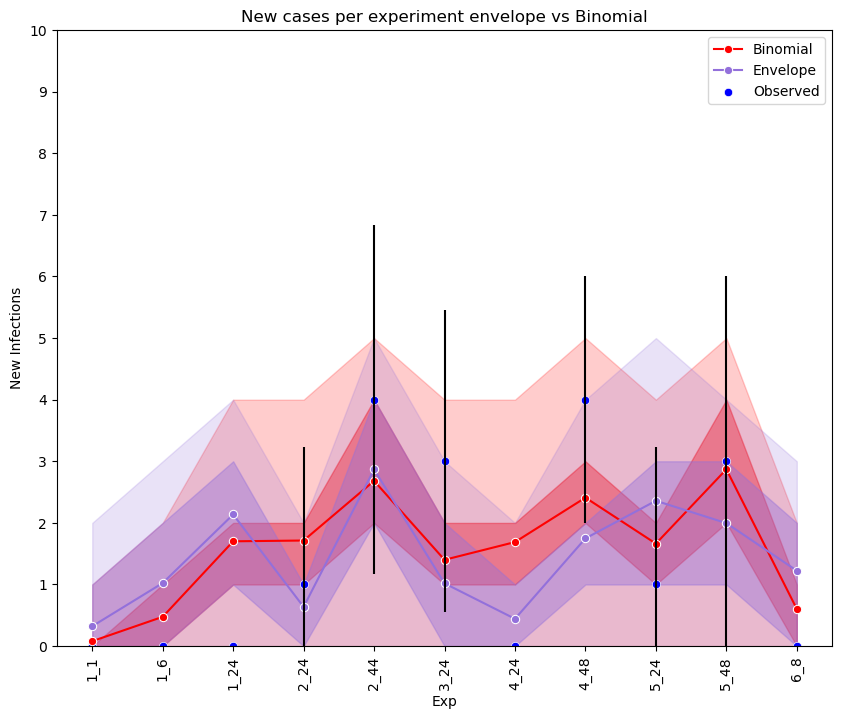

In [9]:
# Plotting the main line and points
plt.figure(figsize=(10, 8))


# plotting results of binomial model in green
sns.lineplot(data=df_bin, x='Exp', y='Mean', color='r', marker= 'o', label='Binomial')
plt.fill_between(df_bin['Exp'], df_bin['CI_2.5'], df_bin['CI_97.5'], color='r', alpha=0.2)
plt.fill_between(df_bin['Exp'], df_bin['CI_25'], df_bin['CI_75'], color='r', alpha=0.4)

# plotting results of envelope model in red
sns.lineplot(data=df_env, x='Exp', y='Mean', color='mediumpurple', marker= 'o', label='Envelope')
plt.fill_between(df_env['Exp'], df_env['CI_2.5'], df_env['CI_97.5'], color='mediumpurple', alpha=0.2)
plt.fill_between(df_env['Exp'], df_env['CI_25'], df_env['CI_75'], color='mediumpurple', alpha=0.4)


# Adding points and error bars from real observations
sns.scatterplot(data=datacal, x='Exp', y='obs', color='blue', label='Observed')
plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')


# Setting labels and title
plt.title("New cases per experiment envelope vs Binomial")
plt.xlabel("Exp")
plt.ylabel("New Infections")

# Setting y-limits and y-ticks
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

# Rotating x-axis labels
plt.xticks(rotation=90)

# Hiding the legend
plt.legend()

plt.show()

## Binomial VS Segmented

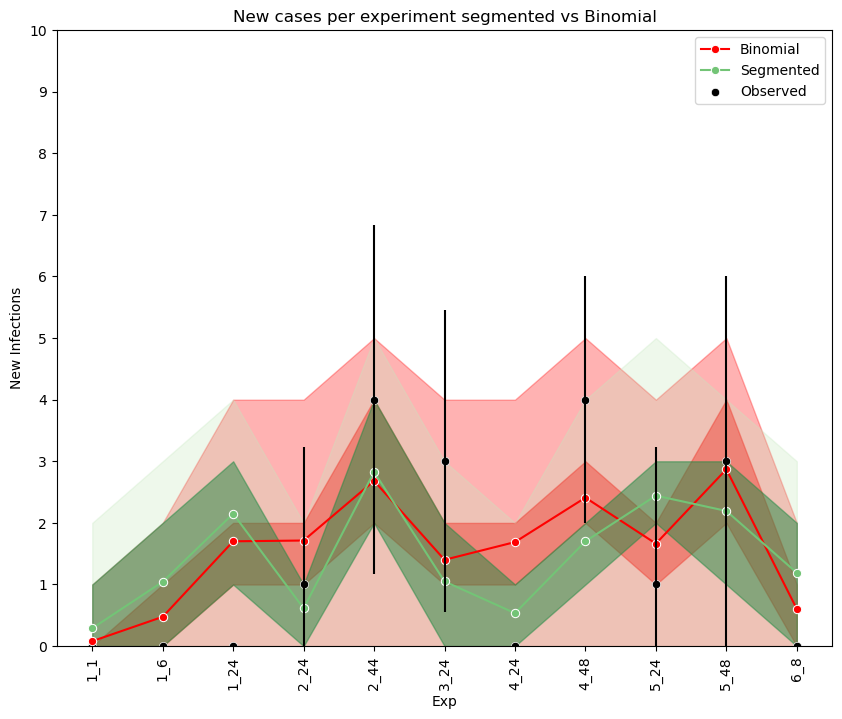

In [10]:
# Create two color palettes
palette_bin = sns.color_palette("Blues", 3)  # Generate 3 shades of blue
palette_seg = sns.color_palette("Greens", 3)  # Generate 3 shades of green

# Plotting the main line and points
plt.figure(figsize=(10, 8))

# plotting results of binomial model in shades of blue
sns.lineplot(data=df_bin, x='Exp', y='Mean', color='r', marker='o', label='Binomial', alpha=1)
plt.fill_between(df_bin['Exp'], df_bin['CI_2.5'], df_bin['CI_97.5'], color='r', alpha=0.3)
plt.fill_between(df_bin['Exp'], df_bin['CI_25'], df_bin['CI_75'], color='r', alpha=0.5)

# plotting results of envelope model in shades of green
sns.lineplot(data=df_seg, x='Exp', y='Mean', color=palette_seg[1], marker='o', label='Segmented', alpha=1)
plt.fill_between(df_seg['Exp'], df_seg['CI_2.5'], df_seg['CI_97.5'], color=palette_seg[0], alpha=0.3)
plt.fill_between(df_seg['Exp'], df_seg['CI_25'], df_seg['CI_75'], color=palette_seg[2], alpha=0.5)

# Adding points and error bars from real observations in black
sns.scatterplot(data=datacal, x='Exp', y='obs', color='black', label='Observed')
plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')

# Setting labels and title
plt.title("New cases per experiment segmented vs Binomial")
plt.xlabel("Exp")
plt.ylabel("New Infections")

# Setting y-limits and y-ticks
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

# Rotating x-axis labels
plt.xticks(rotation=90)

# Displaying the legend
plt.legend()

plt.show()

### Binomial VS (Segmented ; Envelope)

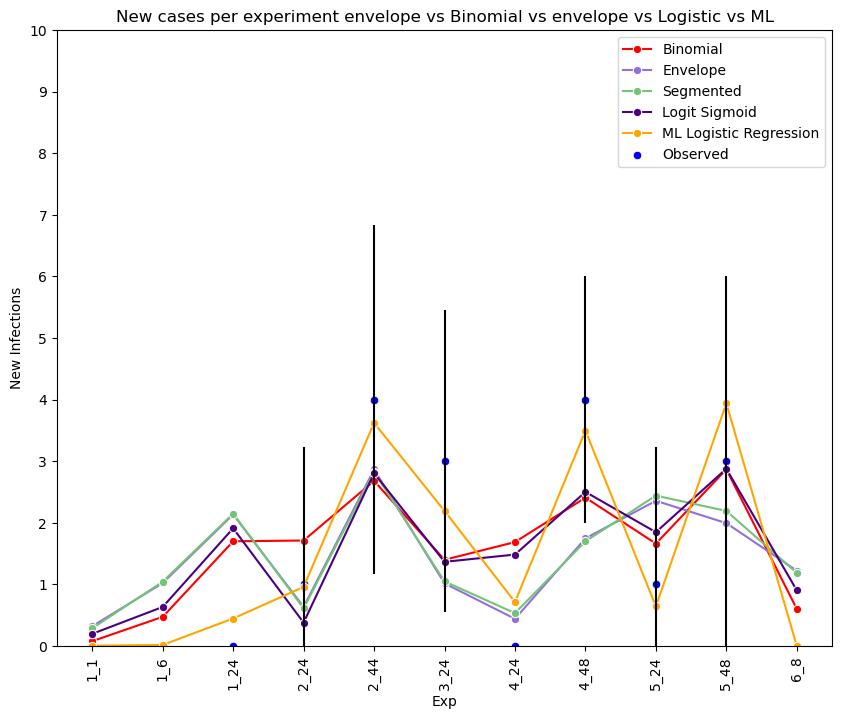

In [11]:
# Plotting the main line and points
plt.figure(figsize=(10, 8))


# plotting results of binomial model in green
sns.lineplot(data=df_bin, x='Exp', y='Mean', color='r', marker= 'o', label='Binomial')

# plotting results of envelope model in red
sns.lineplot(data=df_env, x='Exp', y='Mean', color='mediumpurple', marker= 'o', label='Envelope')


# plotting results of binomial model in green
sns.lineplot(data=df_seg, x='Exp', y='Mean', color=palette_seg[1], marker= 'o', label='Segmented')

# plotting results of binomial model in green
sns.lineplot(data=df_logit, x='Exp', y='Mean', color='indigo', marker= 'o', label='Logit Sigmoid')

sns.lineplot(data=df_ML, x='Exp', y='Mean', color='orange', marker= 'o', label='ML Logistic Regression')


# Adding points and error bars from real observations
sns.scatterplot(data=datacal, x='Exp', y='obs', color='blue', label='Observed')
plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')


# Setting labels and title
plt.title("New cases per experiment envelope vs Binomial vs envelope vs Logistic vs ML")
plt.xlabel("Exp")
plt.ylabel("New Infections")

# Setting y-limits and y-ticks
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

# Rotating x-axis labels
plt.xticks(rotation=90)

# Hiding the legend
plt.legend()

plt.show()


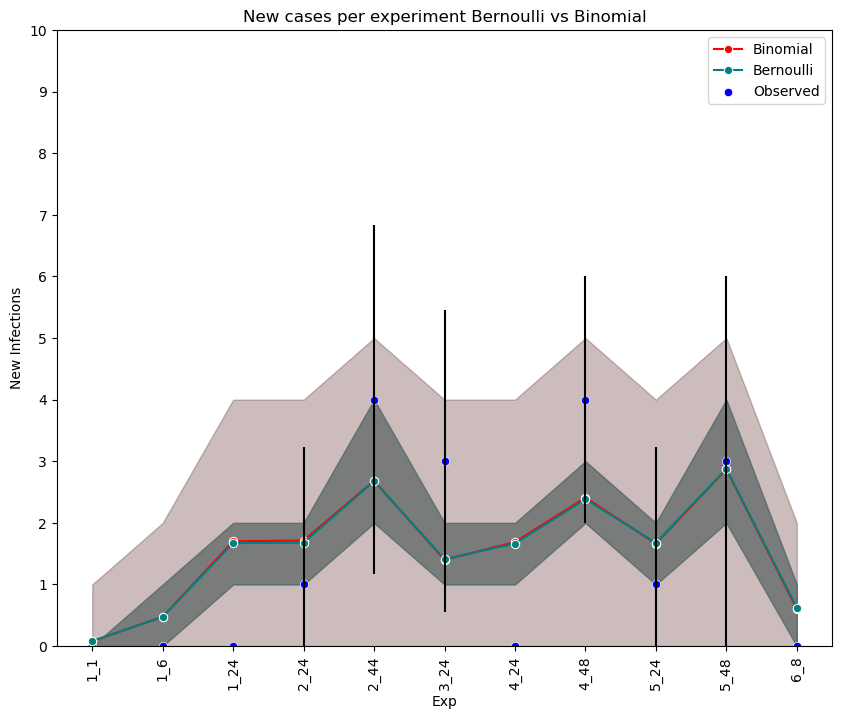

In [12]:
# Plotting the main line and points
plt.figure(figsize=(10, 8))


# plotting results of binomial model in green
sns.lineplot(data=df_bin, x='Exp', y='Mean', color='r', marker= 'o', label='Binomial')
plt.fill_between(df_bin['Exp'], df_bin['CI_2.5'], df_bin['CI_97.5'], color='r', alpha=0.2)
plt.fill_between(df_bin['Exp'], df_bin['CI_25'], df_bin['CI_75'], color='r', alpha=0.4)

# plotting results of envelope model in red
sns.lineplot(data=df_bern, x='Exp', y='Mean', color='teal', marker= 'o', label='Bernoulli')
plt.fill_between(df_bern['Exp'], df_bern['CI_2.5'], df_bern['CI_97.5'], color='teal', alpha=0.2)
plt.fill_between(df_bern['Exp'], df_bern['CI_25'], df_bern['CI_75'], color='teal', alpha=0.4)


# Adding points and error bars from real observations
sns.scatterplot(data=datacal, x='Exp', y='obs', color='blue', label='Observed')
plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')


# Setting labels and title
plt.title("New cases per experiment Bernoulli vs Binomial")
plt.xlabel("Exp")
plt.ylabel("New Infections")

# Setting y-limits and y-ticks
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

# Rotating x-axis labels
plt.xticks(rotation=90)

# Hiding the legend
plt.legend()

plt.show()

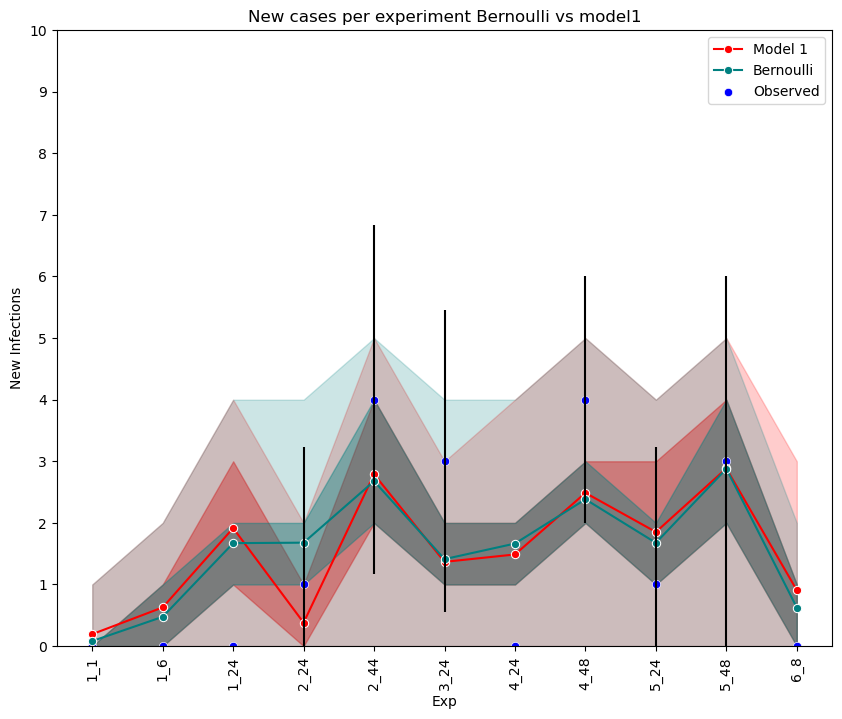

In [13]:
# Plotting the main line and points
plt.figure(figsize=(10, 8))


# plotting results of binomial model in green
sns.lineplot(data=df_model1, x='Exp', y='Mean', color='r', marker= 'o', label='Model 1')
plt.fill_between(df_model1['Exp'], df_model1['CI_2.5'], df_model1['CI_97.5'], color='r', alpha=0.2)
plt.fill_between(df_model1['Exp'], df_model1['CI_25'], df_model1['CI_75'], color='r', alpha=0.4)

# plotting results of envelope model in red
sns.lineplot(data=df_bern, x='Exp', y='Mean', color='teal', marker= 'o', label='Bernoulli')
plt.fill_between(df_bern['Exp'], df_bern['CI_2.5'], df_bern['CI_97.5'], color='teal', alpha=0.2)
plt.fill_between(df_bern['Exp'], df_bern['CI_25'], df_bern['CI_75'], color='teal', alpha=0.4)


# Adding points and error bars from real observations
sns.scatterplot(data=datacal, x='Exp', y='obs', color='blue', label='Observed')
plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')


# Setting labels and title
plt.title("New cases per experiment Bernoulli vs model1")
plt.xlabel("Exp")
plt.ylabel("New Infections")

# Setting y-limits and y-ticks
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

# Rotating x-axis labels
plt.xticks(rotation=90)

# Hiding the legend
plt.legend()

plt.show()


In [25]:
def plot_data_frames(df_list, label_list):
    plt.figure(figsize=(10, 8))
    
    colors = ['r', 'g', 'b', 'y', 'm', 'purple']  # Add more colors if needed
    
    for i in range(len(df_list)):
        df = df_list[i]
        label = label_list[i]
        color = colors[i % len(colors)]  # Get color based on index
        
        sns.lineplot(data=df, x='Exp', y='Mean', marker='o', label=label, color=color)
        
    sns.scatterplot(data=datacal, x='Exp', y='obs', color='blue', label='Observed')
    plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')
    
    plt.title("New cases per experiment")
    plt.xlabel("Exp")
    plt.ylabel("New Infections")
    plt.ylim(0, 10)
    plt.yticks(np.arange(0, 11, 1))
    plt.xticks(rotation=90)
    plt.legend()
    
    plt.show()

In [26]:
df_list = [df_bern, df_model1, df_model3]
label_list = ['Bernoulli', 'model 1', 'Model 3']

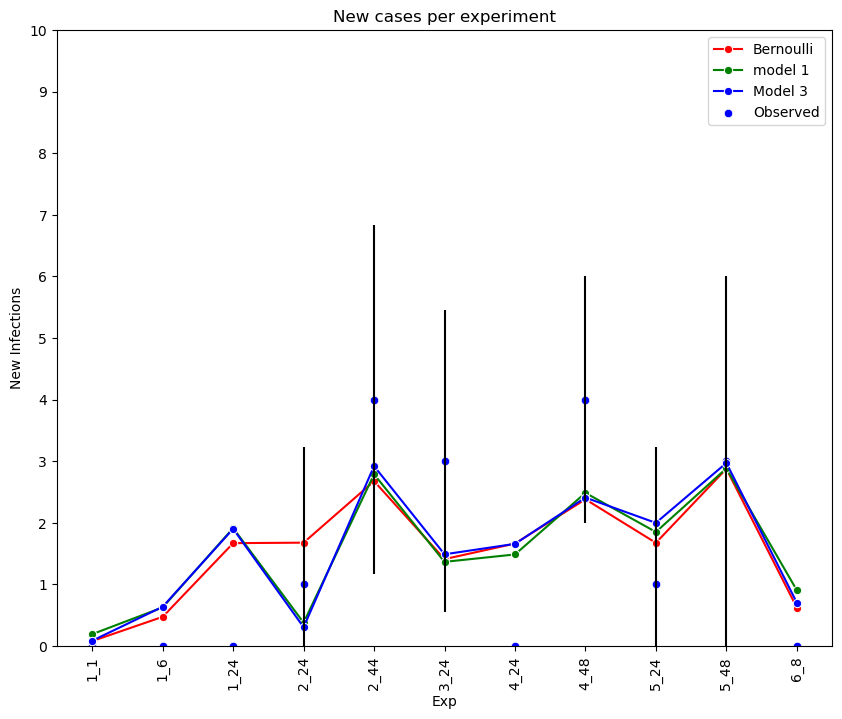

In [27]:
plot_data_frames(df_list, label_list)

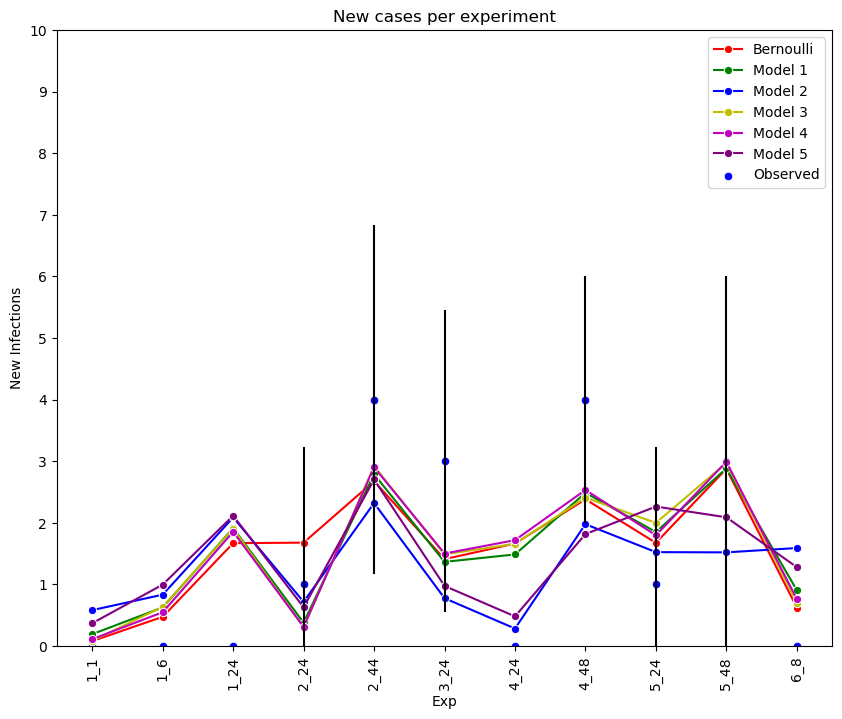

In [28]:
plot_data_frames([df_bern, df_model1, df_model2, df_model3, df_model4, df_model5], ['Bernoulli', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])

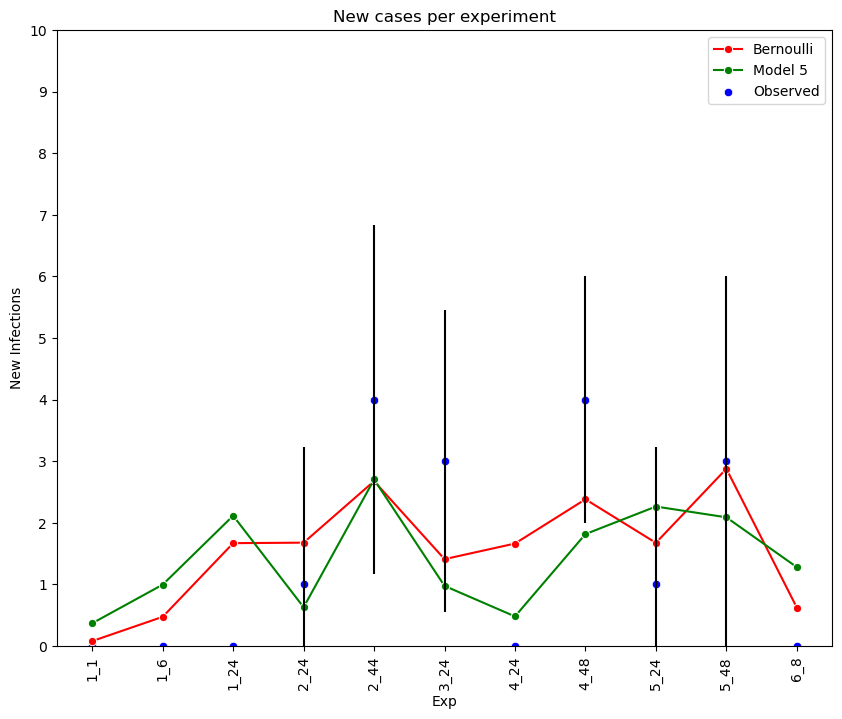

In [29]:
plot_data_frames([df_bern, df_model5], ['Bernoulli',  'Model 5'])

RMSE (Root Mean Squared Error) is a measure of the differences between predicted values and observed values in a regression analysis.
It is calculated by taking the square root of the average of the squared differences between the predicted and observed values.
A **lower** RMSE value indicates a better fit of the model to the data.


In this case, the models were evaluated based on their RMSE values, and the models with lower RMSE values are ranked higher.
The summary table provides the RMSE values for each model, ranked from lowest to highest.

In [39]:
# Calculate RMSE for each model
models = [df_ML, df_bern, df_bin, df_env, df_model1, df_model2, df_model3, df_model4, df_model5, df_seg]  # Add more models if needed
rmse_values = []

for model in models:
    predicted_values = model['Mean']
    observed_values = datacal['obs']
    rmse = np.sqrt(np.mean((predicted_values - observed_values) ** 2))
    rmse_values.append(rmse)

# Create a DataFrame with the model names and RMSE values
summary_df = pd.DataFrame({'Model': ['df_ML', 'df_bern', 'df_bin', 'df_env', 'df_model1', 'df_model2', 'df_model3', 'df_model4', 'df_model5', 'df_seg'],
                           'RMSE': rmse_values})

# Add a 'Rank' column based on the RMSE values
summary_df['Rank'] = summary_df['RMSE'].rank()

# Sort the DataFrame by rank
summary_df = summary_df.sort_values('Rank')

# Print the summary table
summary_df


,Model,RMSE,Rank
0,df_ML,0.501626,1.0
7,df_model4,1.128365,2.0
1,df_bern,1.128400,3.0
2,df_bin,1.133314,4.0
4,df_model1,1.155240,5.0
6,df_model3,1.157696,6.0
8,df_model5,1.367946,7.0
3,df_env,1.371019,8.0
9,df_seg,1.376455,9.0
5,df_model2,1.426914,10.0
